<a href="https://colab.research.google.com/github/Abhaykum123/Bitcoin_Price_Forecasting/blob/main/Bitcoin_Prices_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt
from math import sqrt

In [2]:
df = pd.read_csv("/content/btcusd_1-min_data.csv")

In [3]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [4]:
df.shape

(7129172, 6)

In [5]:
# Convert Timestam to datatime64
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.set_index('Timestamp', inplace=True)
# whole day bitcoin volume daily
df = df.resample('D').mean()
df = df.dropna()
df.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
2012-01-01,4.645697,4.645697,4.645697,4.645697,0.011919
2012-01-02,4.975000,4.975000,4.975000,4.975000,0.007014
2012-01-03,5.085500,5.085500,5.085500,5.085500,0.074365
2012-01-04,5.170250,5.170396,5.170250,5.170396,0.074468
2012-01-05,5.954292,5.954361,5.954292,5.954361,0.048839


In [6]:
df.shape

(4953, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4953 entries, 2012-01-01 to 2025-07-23
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4953 non-null   float64
 1   High    4953 non-null   float64
 2   Low     4953 non-null   float64
 3   Close   4953 non-null   float64
 4   Volume  4953 non-null   float64
dtypes: float64(5)
memory usage: 232.2 KB


In [8]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,4953.0,18921.912121,26526.356088,4.315465,431.743757,6863.192215,28986.034611,120791.738889
High,4953.0,18929.067905,26534.207280,4.315465,431.831646,6866.105438,28999.961514,120824.722917
Low,4953.0,18914.541633,26518.326632,4.315465,431.377743,6860.080660,28971.220903,120759.093750
Close,4953.0,18921.912897,26526.335313,4.315465,431.741403,6863.248569,28985.737875,120792.168056
Volume,4953.0,5.224743,6.298431,0.000000,1.405927,3.225936,6.786994,88.393393


In [10]:
# Price of Bitcoin Over the Year
fig = px.line(df, x=df.index, y='Close', title='Bitcoin Price Over the Years')
fig.update_traces(line=dict(color='gold'))
fig.update_layout(
    xaxis_title='Years',
    yaxis_title='US Dollars',
    template='plotly_dark',
    autosize=False,
    width=1400,
    height=500
)
fig.show()

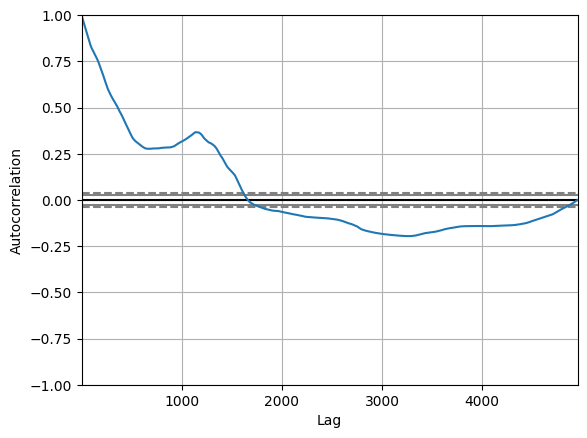

In [11]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
plt.show()

In [12]:
# Rolling mean
df['MA_30'] = df['Close'].rolling(window=30).mean() # Last 30 days
df['MA_90'] = df['Close'].rolling(window=90).mean() # Last 90 days
df['Return'] = df['Close'].pct_change() ## Calculates the percentage change in closing price from one day to the next.
df['Volatility'] = df['Return'].rolling(window=30).std() # Measures how risky or unstable the price is
df['EMA_10'] = df['Close'].ewm(span=10).mean() # Calculates the Exponential Moving Average for the last 10 days
df['Momentum'] = df['Close'] - df['Close'].shift(10) # how much the price has changed in the past 10 days.

In [13]:
import plotly.graph_objects as go

fig = go.Figure()

# Close Price
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close Price'))

# 30-Day Moving Average
fig.add_trace(go.Scatter(x=df.index, y=df['MA_30'], mode='lines', name='30-Day MA'))

# 90-Day Moving Average
fig.add_trace(go.Scatter(x=df.index, y=df['MA_90'], mode='lines', name='90-Day MA'))

# Update layout
fig.update_layout(
    title='Moving Averages',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_dark',
    legend=dict(x=0, y=1)
)
plt.tight_layout()
fig.show()


<Figure size 640x480 with 0 Axes>

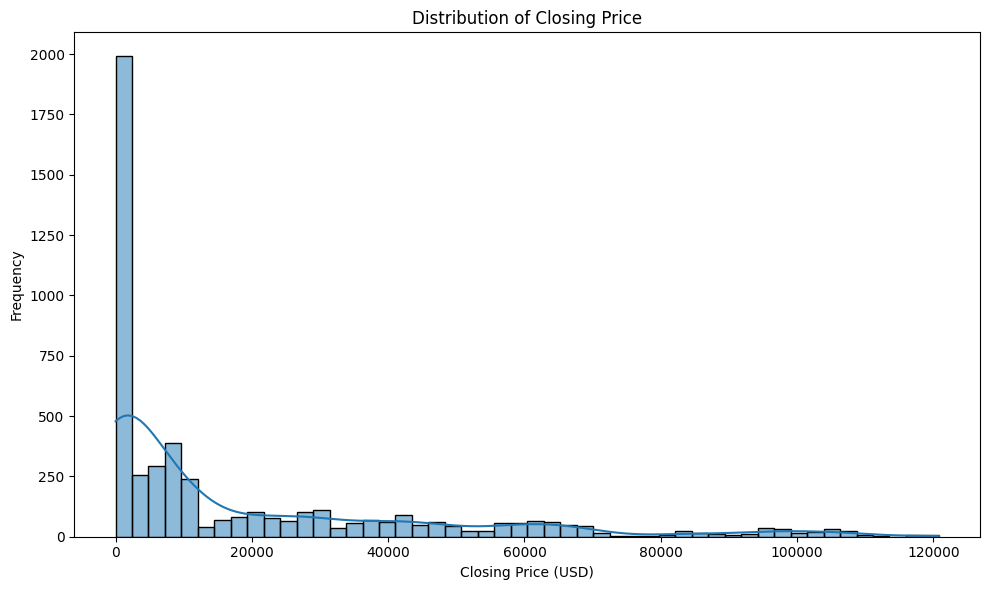

In [14]:
# Distribution of Closing Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Price')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
correlation = df.corr()

# Heatmap for correlation
fig = px.imshow(
    correlation,
    text_auto=True,
    color_continuous_scale='RdBu',
    labels=dict(color="Correlation"),
    title="Correlation Matrix"
)

fig.update_layout(
    width=1000,
    height=600,
)

fig.show()

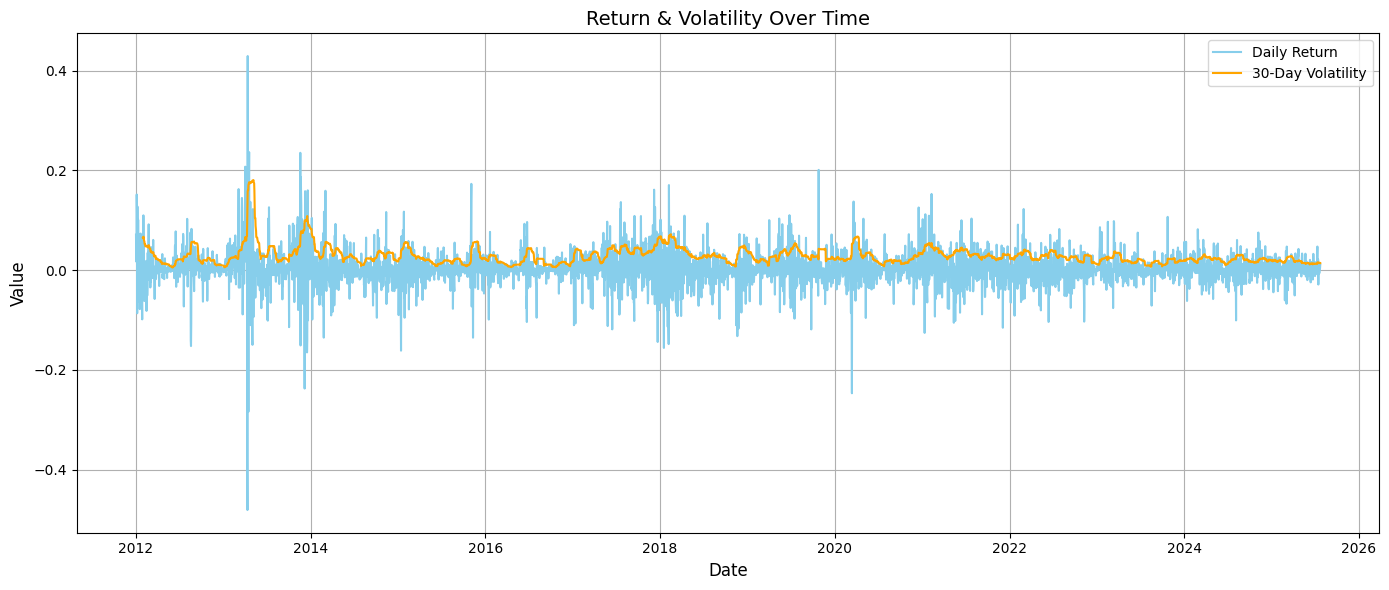

In [16]:
plt.figure(figsize=(14,6))

# Plotting the return and volatility
plt.plot(df['Return'], label='Daily Return', color='skyblue')
plt.plot(df['Volatility'], label='30-Day Volatility', color='orange')

# Adding labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Return & Volatility Over Time', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Create the figure
fig = go.Figure()

# Add Daily Return line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Return'],
    mode='lines',
    name='Daily Return',
    line=dict(color='skyblue')
))

# Add 30-Day Volatility line
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Volatility'],
    mode='lines',
    name='30-Day Volatility',
    line=dict(color='orange')
))

fig.update_layout(
    title='Return & Volatility Over Time',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_dark',
    legend=dict(x=0, y=1.0)
)
plt.tight_layout()
fig.show()


<Figure size 640x480 with 0 Axes>

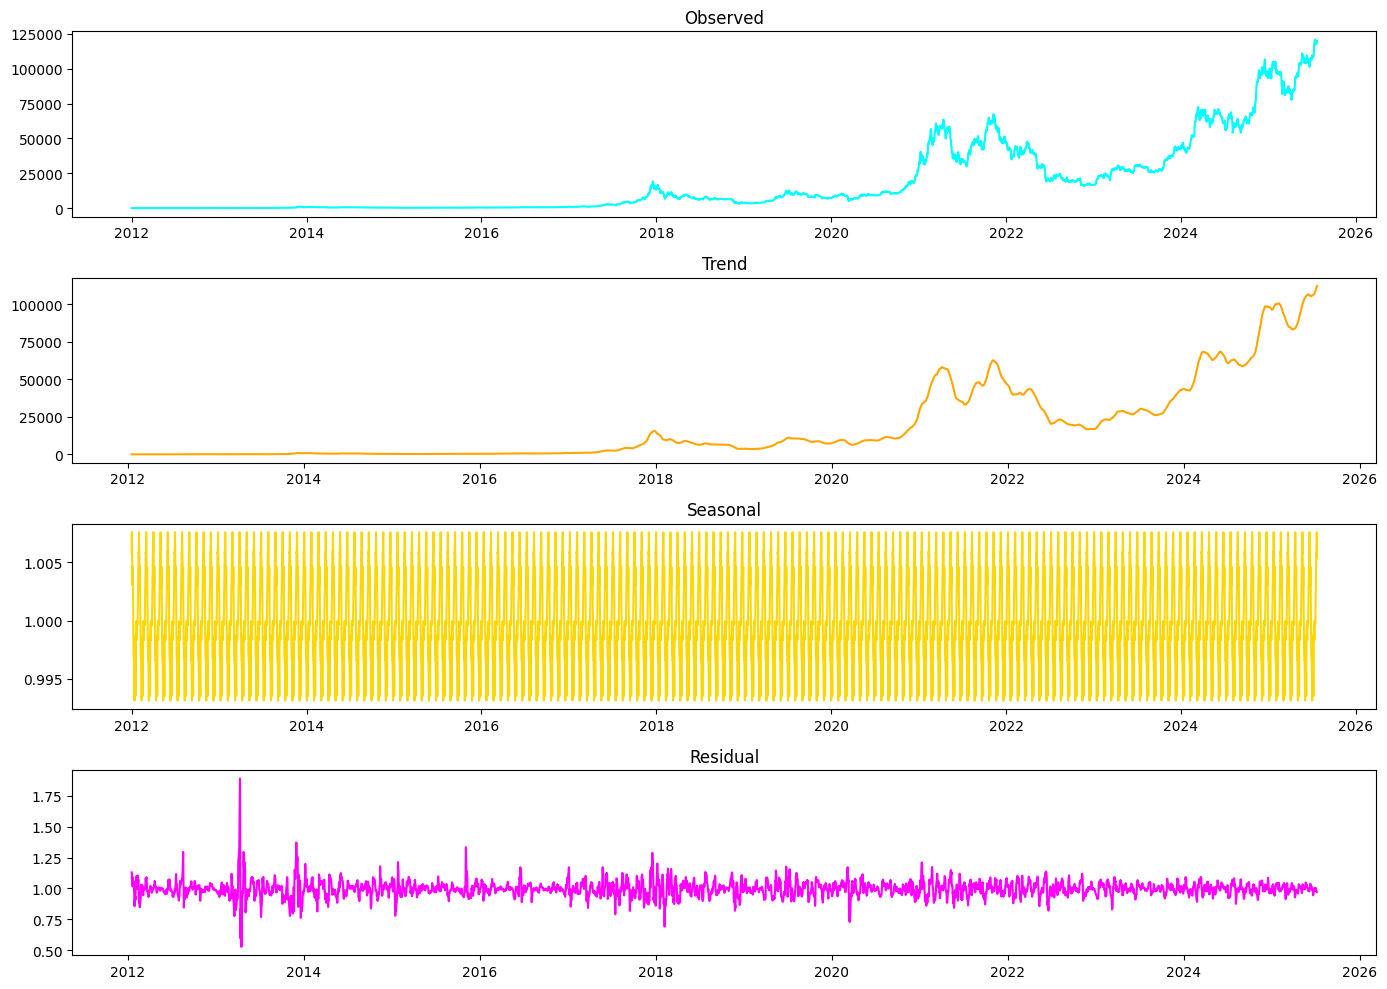

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Close'].dropna(), model='multiplicative', period=30)

'''
1. Long-term trend
2. Short-term repeating behavior
3. Unexplained random variations
'''

plt.figure(figsize=(14, 10))

# Observed
plt.subplot(411)
plt.plot(result.observed, color='cyan')
plt.title('Observed')

# Trend
plt.subplot(412)
plt.plot(result.trend, color='orange')
plt.title('Trend')

# Seasonal
plt.subplot(413)
plt.plot(result.seasonal, color='gold')
plt.title('Seasonal')

# Residual
plt.subplot(414)
plt.plot(result.resid, color='magenta')
plt.title('Residual')

plt.tight_layout()
plt.show()


In [19]:
# Create interactive scatter plot
fig = px.scatter(
    df,
    x='Volume',
    y='Close',
    title='Volume vs Close Price',
    template='plotly_dark',
    color_discrete_sequence=['cyan']
)

fig.update_layout(
    xaxis_title='Volume',
    yaxis_title='Close Price'
    # height=600,
    # width=900
)

# Show the figure
plt.tight_layout()
fig.show()


<Figure size 640x480 with 0 Axes>

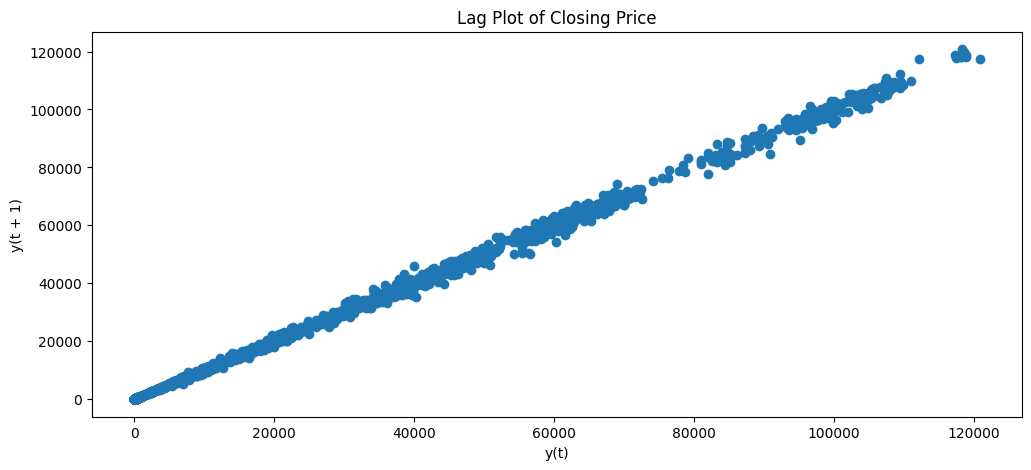

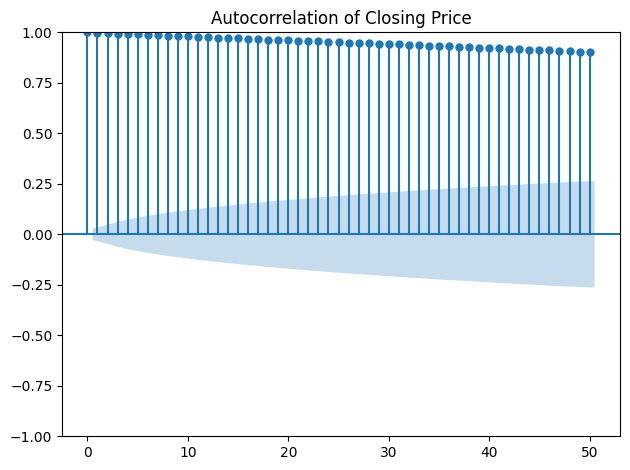

In [20]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 5))
lag_plot(df['Close'])
plt.title('Lag Plot of Closing Price')
plt.show()

plot_acf(df['Close'].dropna(), lags=50)
plt.title('Autocorrelation of Closing Price')
plt.tight_layout()
plt.show()
